# DSP1: Assignment 1

### Deadline: January 12 (until 23:59)


**Instructions:** All answers should be filled in the notebook and then submitted  For theoretical question you can use markdown and LaTeX. Name of notebook should be in following format:
 - Name_group_Assignment1.ipynb (ex. Elon_Musk_200X_Assignment1.ipynb)

## Q1 (20%)
Read video games sales data from vgsales.csv file. This dataset contains a list of video games with sales greater than 100,000 copies. Fields include:
* Rank - Ranking of overall sales
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales.

**Tasks to do:**
1. Using your favorite visualization library build histograms and boxplots for NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales? 
2. What is the average sales for each region? 
3. What is the standard deviation for each region?
4. How many outliers (using IQR rule) we have in Global_Sales column?
5. What is the difference between mean and median values in Global_Sales column? 
6. Remove outliers and plot histogram and boxplot again. 
7. What is the difference between mean and median now?
8. In your opinion what happened, why difference between mean and median have changed?

*Hint: use pandas to read dataset.*

In [1]:
# Please, write your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from scipy import stats
import statistics as st
import math
%matplotlib inline
data = pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
df = pd.DataFrame(data)

In [3]:
df.dropna()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
numerical_col = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

<AxesSubplot:>

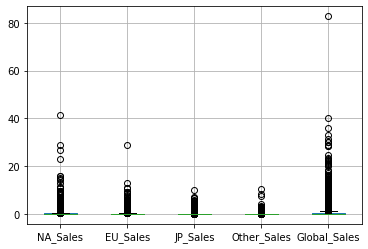

In [5]:
#Using your favorite visualization library build histograms and boxplots for NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales
df.boxplot(numerical_col)

array([[<AxesSubplot:title={'center':'NA_Sales'}>,
        <AxesSubplot:title={'center':'EU_Sales'}>],
       [<AxesSubplot:title={'center':'JP_Sales'}>,
        <AxesSubplot:title={'center':'Other_Sales'}>],
       [<AxesSubplot:title={'center':'Global_Sales'}>, <AxesSubplot:>]],
      dtype=object)

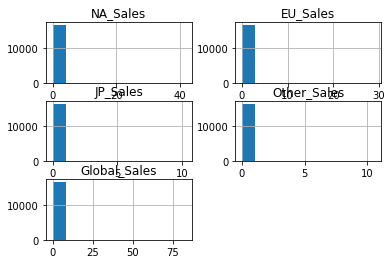

In [6]:
#Using your favorite visualization library build histograms and boxplots for NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales
df.hist(numerical_col)

In [7]:
#convert data types from object to float for calculations
df['NA_Sales'] = df['NA_Sales'].astype(float)
df['EU_Sales'] = df['EU_Sales'].astype(float)
df['JP_Sales'] = df['JP_Sales'].astype(float)
df['Other_Sales'] = df['Other_Sales'].astype(float)
df['Global_Sales'] = df['Global_Sales'].astype(float)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
#What is the average sales for each region?
#Avarage for NA_Sales
df['NA_Sales'].mean()

0.26466742981084057

In [9]:
#Avarage for EU_Sales:
df['EU_Sales'].mean()

0.1466520062658483

In [10]:
#Avarage for JP_Sales:
df['JP_Sales'].mean()

0.07778166044101108

In [11]:
#Avarage for Other_Sales:
df['Other_Sales'].mean()

0.048063019640913515

In [12]:
#Avarage for Global_Sales:
df['Global_Sales'].mean()

0.53744065550074

In [13]:
#What is the standard deviation for each region?
print('NA_Sales std')
print(df.std()['NA_Sales'])
print('EU_Sales std')
print(df.std()['EU_Sales'])
print('JP_Sales std')
print(df.std()['JP_Sales'])
print('Other_Sales std')
print(df.std()['Other_Sales'])
print('Global_Sales std')
print(df.std()['Global_Sales'])

NA_Sales std
0.8166830292990428
EU_Sales std
0.5053512312869366
JP_Sales std
0.30929064808213236
Other_Sales std
0.18858840291278392
Global_Sales std
1.5550279355699022


In [14]:
#How many outliers (using IQR rule) we have in Global_Sales column

Q1 = np.percentile(df['Global_Sales'], 25) 
Q2 = np.percentile(df['Global_Sales'], 50) 
Q3 = np.percentile(df['Global_Sales'], 75) 
  
print('Q1 25%', Q1)
print('Q2 50% ', Q2)
print('Q3 75%', Q3)
  
IQR = Q3 - Q1 
print('IQR is -', IQR)

Q1 25% 0.06
Q2 50%  0.17
Q3 75% 0.47
IQR is - 0.41


In [15]:
#What is the difference between mean and median values in Global_Sales column
global_median = df['Global_Sales'].median()
global_median

0.17

In [16]:
global_mean = df['Global_Sales'].mean()
global_mean

0.53744065550074

In [17]:
dif = global_mean - global_median
dif

0.36744065550074

In [18]:
#Remove outliers and plot histogram and boxplot again
new_df = df[df['Global_Sales']<Q3]
new_df.shape

(12374, 11)

<AxesSubplot:>

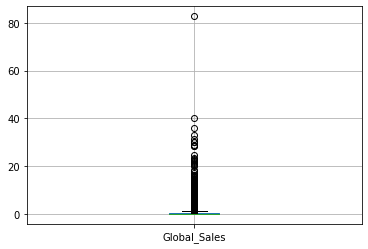

In [19]:
df.boxplot('Global_Sales')

<AxesSubplot:>

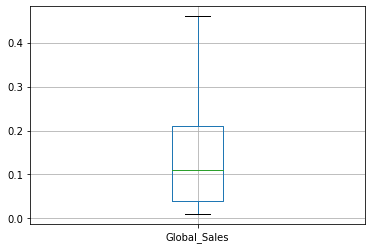

In [20]:
new_df.boxplot('Global_Sales')

array([[<AxesSubplot:title={'center':'Global_Sales'}>]], dtype=object)

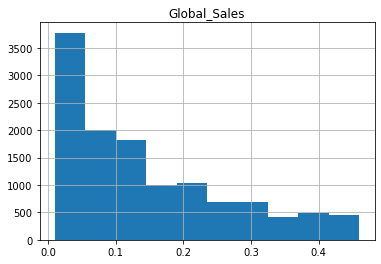

In [21]:
new_df.hist('Global_Sales')

In [22]:
#What is the difference between mean and median now
new_median = new_df['Global_Sales'].median()
new_median

0.11

In [23]:
new_mean = new_df['Global_Sales'].mean()
new_mean

0.1427194116696151

In [24]:
new_dif = new_mean - new_median
new_dif

0.0327194116696151

## Q2 (20%)
Suppose that S is a random variable of the AITU graduates salaries in the first year of work, which is assumed to be normally distributed with the population mean µ = 500 thousand KZT and the population standard deviation σ = 80 thousand KZT. 

**Find the following probabilities:**
1. A graduate will have salary below 450 thousand KZT?
2. A graduate will have salary below the median salary?
3. A graduate will have salary above 660 thousand KZT?
4. A graduate will have salary between 400 and 600 thousand KZT?
5. In a sample of 25 graduates, what percentage of that students will have salary between 480 and 520 thousand KZT?

*Hint: Use SciPy's norm module and write all answers in one cell (using print(command)) for convenience.*

In [25]:
# Please, write your code here
import scipy.stats

In [26]:
print('1)', norm.cdf(x=450, loc=500, scale=80))
print('2)', norm.cdf(x=500, loc=500, scale=80)) #mean = median = 500 
print('3)', 1 - norm.cdf(x=660, loc=500, scale=80))
print('4)', norm.cdf(x=600, loc=500, scale=80) - norm.cdf(x=400, loc=500, scale=80))
print('5)', 100 * (norm.cdf(x=520, loc=500, scale=80/5) - norm.cdf(x=480, loc=500, scale=80/5))) #78.8%

1) 0.26598552904870054
2) 0.5
3) 0.02275013194817921
4) 0.7887004526662893
5) 78.87004526662894


## Q3 (20%)
We have a sample data about GPA for two groups of students (software engineers and big data analytics), which are presented in the lists below. Based on these data, do the following:
1. Construct 95% confidence interval for the population mean of software engineer students' GPA. State all the assumptions. 
2. Is there an evidence that average GPA for this group is larger than 2.9?
3. Construct 95% confidence interval for difference between two population means of GPA. State all the assumptions. 
4. Is there an evidence that one group has higher average GPA than another? If yes, which group performs better?
5. How your analysis would change in Task 1, if the sample size was 30? What if 20? Explain.

*Note: do not use too many cells for one task. For theoretical question use markdown cells.*

In [27]:
gpa_se = [3.54, 3.17, 2.68, 3.08, 3.43, 3.11, 3.33, 2.70, 3.29, 3.94, 3.50, 3.07, 3.05,
          3.33, 3.37, 3.25, 2.90, 3.05, 3.55, 2.63, 3.03, 2.94, 2.80, 3.05, 2.91, 3.22,
          3.21, 3.09, 3.09, 3.06, 3.29, 3.12, 2.90, 3.42, 3.47, 2.99, 3.35, 2.94, 3.03,
          2.71, 3.09, 3.51, 3.73, 2.92, 3.47, 3.14, 3.19, 3.23, 2.35, 3.06, 3.71, 3.44]

In [28]:
gpa_bda = [3.16, 3.40, 3.61, 3.37, 3.24, 3.40, 3.00, 2.78, 3.22, 3.43, 3.32, 3.58,
           3.46, 3.45, 3.52, 3.13, 3.13, 3.81, 3.22, 3.65, 2.65, 3.51, 3.94, 3.86,
           3.30, 3.31, 3.45, 3.17, 3.57, 3.90, 3.54, 3.41, 3.39, 3.99, 3.24, 3.50,
           3.44, 3.55, 3.40, 3.17, 3.18, 3.67, 3.64, 3.29, 3.32, 3.19, 2.71, 3.79,
           3.12, 3.32, 3.17, 3.38, 3.76, 3.19, 3.47, 3.41, 3.01, 3.47, 2.72, 3.16]

In [29]:
# Please, write your code here
#Construct 95% confidence interval for the population mean of software engineer students' GPA. State all the assumptions.
x_bar = np.mean(gpa_se)
x_bar

3.162115384615385

In [30]:
sigma_3 = np.std(gpa_se, ddof=0)
sigma_3

0.2970711941247388

In [31]:
n = len(gpa_se)
n

52

In [32]:
std_error = sigma_3/np.sqrt(n)
std_error

0.04119636241846394

In [33]:
ci_95_1 = t.interval(alpha=0.95, df=n, loc=x_bar, scale=sigma_3)
print('Lower bound:', round(ci_95_1[0], 3))
print('Upper bound:', round(ci_95_1[1], 3))

Lower bound: 2.566
Upper bound: 3.758


In [34]:
#Is there an evidence that average GPA for this group is larger than 2.9?
#there are lower gpa is 2.58 and upper gpa is 3.744, so we can say that +- near 2.9 

In [35]:
#Construct 95% confidence interval for difference between two population means of GPA. State all the assumptions.
bda_mean = np.mean(gpa_bda)
bda_mean

3.3689999999999998

In [36]:
se_mean = np.mean(gpa_se)
se_mean

3.162115384615385

In [37]:
dif_of_f = bda_mean-se_mean
dif_of_f

0.2068846153846149

In [38]:
bda_std = np.std(gpa_bda, ddof=0)
bda_std

0.2854978108497506

In [39]:
se_std = np.std(gpa_se, ddof=0)
se_std

0.2970711941247388

In [40]:
dif_std_error = bda_std/np.sqrt(len(gpa_bda)) - se_std/np.sqrt(len(gpa_se))
dif_std_error

-0.004338753525138628

In [41]:
ci_95_3 = norm.interval(alpha=0.95, loc=dif_of_f, scale=dif_std_error)
print('Lower bound:', round(ci_95_3[0], 3))
print('Upper bound:', round(ci_95_3[1], 3))

Lower bound: nan
Upper bound: nan


In [42]:
#Is there an evidence that one group has higher average GPA than another? If yes, which group performs better?
bda = len(gpa_bda)
bda

60

In [43]:
se = len(gpa_se)
se

52

In [44]:
bda_mean = np.mean(gpa_bda)
bda_mean

3.3689999999999998

In [45]:
se_mean = np.mean(gpa_se)
se_mean

3.162115384615385

In [46]:
bda_med = np.median(gpa_bda)
bda_med

3.395

In [47]:
se_med = np.median(gpa_se)
se_med

3.115

In [48]:
# we can see that there are bda students more than se students, but anyway, the avarage gpa of bda students more than se's studensts
# also we can check the median of them, in this case, bda's gpa also higher than se

In [49]:
#How your analysis would change in Task 1, if the sample size was 30? What if 20? Explain.
n_5 = 30
ci_95_5 = t.interval(alpha=0.95, df=n_5, loc=x_bar, scale=sigma_3)
print('Lower bound:', round(ci_95_5[0], 3))
print('Upper bound:', round(ci_95_5[1], 3))

Lower bound: 2.555
Upper bound: 3.769


In [50]:
n_5_1 = 20
ci_95_5_1 = t.interval(alpha=0.95, df=n_5_1, loc=x_bar, scale=sigma_3)
print('Lower bound:', round(ci_95_5_1[0], 3))
print('Upper bound:', round(ci_95_5_1[1], 3))

Lower bound: 2.542
Upper bound: 3.782


## Q4 (10%)
Consider the set of data below (my_list). Does it appear to approximately follow a normal distribution? Justify your answer.

*Hint: Check for the properties of the Normal distribution and for the graph of distribtuion.*

In [51]:
my_list = [113, 71, 89, 143, 140, 146, 122, 104, 134, 143, 110, 131, 125, 116, 
           164, 107, 113, 122, 119, 116, 98, 161, 128, 152, 116, 83, 86, 155,
           128, 122, 95, 122, 131, 134, 107, 113, 101, 92, 134, 140]

In [52]:
# Please, write your code here
n = len(my_list)
mu = round(sum(my_list)/len(my_list))
sigma = round(np.std(my_list), 4)

mode = max(my_list, key = my_list.count)
median = round(np.median(my_list))
print('Size:'+ str(n) + '\n' + 'Mean:' + str(mu) + '\n'+ 'Std.:' + str(sigma) 
      + '\n' + 'Mode:'+ str(mode) + '\n' + 'Median:'+ str(median))

Size:40
Mean:121
Std.:21.4552
Mode:122
Median:122


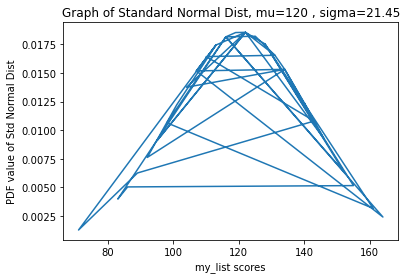

In [53]:
Y = norm.pdf(my_list, loc=120.65, scale=21.45)  #array of probabilities

plt.plot(my_list, Y)
plt.title('Graph of Standard Normal Dist, mu=120 , sigma=21.45')
plt.xlabel('my_list scores')
plt.ylabel('PDF value of Std Normal Dist');

## Q5 (10%)
Generate synthetic data (numpy.random.normal) with mean = 70, std = 12 and size = 1000 (round it to nearest integer). 

__Tasks to do:__
1. Plot histogram
2. What is the mean, median and mode
3. Build function to calculate standard deviation using standard Python functionality
4. Calculate std. using your function and compare it with numpy function

In [54]:
# Please, write your code here
s = np.random.normal(70,12,1000)

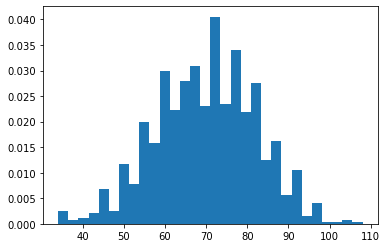

In [55]:
data = [np.round(x) for x in s]

# Histogram
plt.hist(x=data, bins=30, density=True);

In [56]:
df = pd.DataFrame(s)

In [57]:
mean = round(sum(data)/len(data))
print('Mean:', mean)
    
median = round(np.median(data))
print('Median:', median)

mode = max(data, key = data.count)
print('Mode:', mode)

Mean: 70
Median: 70
Mode: 67.0


In [58]:
def calc_std(X):
    sigma = 0.0
    mu = round(sum(X)/len(X), 4)
    n = len(X)
    for x in X:
        sigma += (x - mu)**2   
    sigma = sigma/n
    sigma = sigma**(1/2)
    sigma = round(sigma, 4)
    return sigma

In [59]:
print('function std.:', calc_std(data))
print('numpy std.:',round(np.std(data), 4))

function std.: 12.1842
numpy std.: 12.1842


## Q6 (10%)
Prove the following expression:

$$Var(X) = E((X-\mu)^2) = E(X^2) - (E(X))^2$$




*Hint: For proof write it down in markdown cell below using LaTex.*

#### Please, write your proof here (as markdown)
$$Var(X) = E((X-\mu)^2) = E(X^2) - (E(X))^2$$
$$Var(x) = E((X - \mu)^2)$$
$$Var(x) = E((X-E(x))^2)$$
$$Var(x) = E((X-E(X))(X-E(X)))$$
$$Var(x) = E(X^2 - 2X*E(X) + (E(X))^2)$$
$$Var(x) = E(X^2) - 2E(X*E(X)) + E((E(X))^2)$$
$$Var(x) = E(X^2)-2E(E(X)*E(X)) + E((E(X))^2)$$
$$Var(x) = E(X^2) - 2(E(X))^2 + (E(X))^2$$
$$Var(x) = E(X^2) - (E(X))^2$$

## Q7 (10%)
For each of the cases of confidence intervals in the lecture (3 simple and 5 complicated) find/create an example and mention corresponding assumptions such as sample size or original distribution or variance. Also, note that you should not use examples that was presented during the lecture. 

*Note: no need to create a problem, just a situation which will correspond to the confidence interval case.*

In [60]:
# Please, write your examples here (as markdown)

---

### Evaluation (Keep it!)

| Question | Mark     | Comment   
|:-------:|:--------:|:----------------------
| 1       |   20/20    |     
| 2       |   20/20 | 
| 3       |   20/20    |     
| 4       |   10/10 | 
| 5       |   10/10    |     
| 6       |   10/10 | 
| 7       |   10/10    |     
|**Total**|**100/100**  | 
